# Psychiatric Patient Detection Using Machine Learning Algorithms


## Data Preprocessing

### Data Segmentation

#### Psychiatric Data

In [ ]:
# Importing libraries ['Pandas', 'Numpy', 'Regular Expression(re)', 'String']

import pandas as pd

import numpy as np

import re

import string

import warnings

In [ ]:
# Ignore warnings

warnings.filterwarnings("ignore")

In [ ]:
!pip install openpyxl

In [ ]:

# Importing the excel files and storing them in the dataframes

# Contains health data of all the patients
df_data_all = pd.read_excel('Dataset.xlsx', sheet_name='Dataset')

# Contains disease-wise segregation of patients
df_cases_segregated = pd.read_excel('MasterfileComplication.xlsx', sheet_name ="Filtered")


'\n# Importing the excel files and storing them in the dataframes\n\n# Contains health data of all the patients\ndf_data_all = pd.read_excel(\'Dataset.xlsx\', sheet_name=\'Dataset\')\n\n# Contains disease-wise segregation of patients\ndf_cases_segregated = pd.read_excel(\'MasterfileComplication.xlsx\', sheet_name ="Filtered")\n'

In [ ]:
# Displaying dataframe (df_data_all)

df_data_all.head()

,case,EstimatedBodyWeight,Bmi,SizeCm,DateTime,PrimaryAssessmentCirculationComment,ObservationCirculationComment,NoVitals,BloodGlucoseLevelOutOfRange,PainScale,...,text-ObjectivCirculationOthers,text-ObjectivCirculations,text-ObjectivSkinAssessments,text-PriAssesmentCircOthers,text-PriAssesmentCirculations,text-PriAssesmentSkin,Group,IllnessType,MainDiagnosis,InjuryDetail
0,0000e1f3-cfa1-4d44-92fb-7336c87e1c3d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],...,NaN,NaN,NaN,NaN,"['Rechts', 'Puls tastbar', 'stark', 'peripher']",NaN,Sickness,['Fieberhafter Infekt'],[False],['Verdachtsdiagnose: Erkrankung: Fieberhafter ...
1,000111dc-929b-4a5d-ac15-900568f7f571,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,['unauffällig'],NaN,NaN,NaN,NaN
2,00017976-caf1-4900-b7e9-90a197b713cf,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,['unauffällig'],Sickness,['Intoxikation Alkohol'],[False],['Verdachtsdiagnose:Erkrankung:Intoxikation Al...
3,0001dd7a-c0e2-4b94-84e3-6387a626418d,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,NaN,...,['Stabil'],NaN,NaN,['Stabil'],NaN,NaN,Sickness,['Fieberhafter Infekt'],[True],NaN
4,0002934c-9209-4316-ba4f-6f119017082e,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,[7.0],...,['Stabil'],NaN,NaN,['Stabil'],NaN,NaN,Injured,NaN,[False],['Fraktur']


In [ ]:
# Shape of the dataframe (df_data_all)

df_data_all.shape

(273183, 100)

In [ ]:
# Displaying dataframe (df_cases_segregated)

df_cases_segregated.head()

,case,illness_type,injury_detail,Abdominal diseases,Cardiovascular diseases,CNS diseases,Gyn-obstetrics emergencies,Infections,Metabolic diseases,Other diseases,Psychiatric diseases,Respiratory diseases,No Disease,N/A
0,0000e1f3-cfa1-4d44-92fb-7336c87e1c3d,Fieberhafter Infekt,Verdachtsdiagnose: Erkrankung: Fieberhafter In...,NaN,NaN,NaN,NaN,NaN,NaN,Fieber,NaN,NaN,NaN,1
1,000111dc-929b-4a5d-ac15-900568f7f571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,00017976-caf1-4900-b7e9-90a197b713cf,Intoxikation Alkohol,Verdachtsdiagnose:Erkrankung:Intoxikation Alko...,NaN,NaN,NaN,NaN,NaN,NaN,Intox,Alkohol,NaN,NaN,2
3,0001dd7a-c0e2-4b94-84e3-6387a626418d,Fieberhafter Infekt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fieber,NaN,NaN,NaN,1
4,0002934c-9209-4316-ba4f-6f119017082e,NaN,Fraktur,NaN,NaN,NaN,NaN,NaN,NaN,Fraktur,NaN,NaN,NaN,1


In [ ]:
# Shape of the dataframe (df_cases_segregated)

df_cases_segregated.shape

(273183, 14)

Case count per Disease

In [ ]:
# List of disease columns to check
disease_columns = ['Abdominal diseases', 'Cardiovascular diseases', 'CNS diseases', 'Gyn-obstetrics emergencies', 'Infections', 'Metabolic diseases', 'Other diseases', 'Psychiatric diseases', 'Respiratory diseases',]

In [ ]:
# Create a new column that sets 1 if all selected columns have NaN, otherwise NaN
df_cases_segregated['No_Disease_Flag'] = df_cases_segregated[disease_columns].isna().all(axis=1).astype(int).replace(0, np.nan)

In [ ]:
# Count per diagnosed disease
diagnosed_counts = df_cases_segregated.count(axis=0)

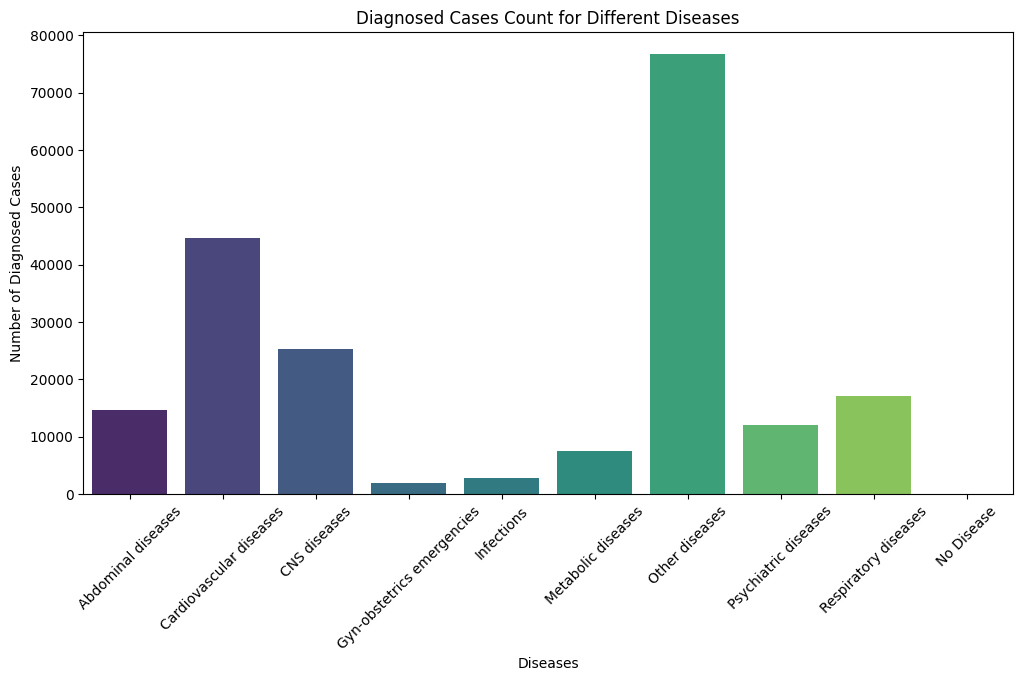

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=diagnosed_counts.index[3:-2], y=diagnosed_counts.values[3:-2], palette='viridis')

# Labels and title
plt.xlabel("Diseases")
plt.ylabel("Number of Diagnosed Cases")
plt.title("Diagnosed Cases Count for Different Diseases")

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

'df_cases_segregated' contains case numbers of all the patients in segregated form. We can filterout the case numbers for a specific disease which can then be used to filterout data of those cases from 'df_data_all' dataframe.

Here, we are working with 'Pyschiatric' usecase. Hence we will drop all columns other than 'case' and 'Psychiatric diseases	' from df_cases_segregated dataframe.

In [ ]:
# Creating dataframe for storing case numbers only for psychiatric cases

columns_to_keep = ['case','Psychiatric diseases']

df_cases_psychiatric = df_cases_segregated[columns_to_keep]

In [ ]:
# Printing new dataframe

df_cases_psychiatric.head()

,case,Psychiatric diseases
0,0000e1f3-cfa1-4d44-92fb-7336c87e1c3d,NaN
1,000111dc-929b-4a5d-ac15-900568f7f571,NaN
2,00017976-caf1-4900-b7e9-90a197b713cf,Alkohol
3,0001dd7a-c0e2-4b94-84e3-6387a626418d,NaN
4,0002934c-9209-4316-ba4f-6f119017082e,NaN


Now, the cases having 'NaN' values in 'Psychiatric diseases' column belong to other diseases. Hence we drop all the cases having 'NaN' values.

In [ ]:
# Dropping NA values

df_cases_psychiatric = df_cases_psychiatric.dropna()

In [ ]:
df_cases_psychiatric.head()

,case,Psychiatric diseases
2,00017976-caf1-4900-b7e9-90a197b713cf,Alkohol
12,000b1628-4658-480c-9d44-24866a6e14bd,Alkohol
47,00257d7d-3ab0-4267-80da-fb4c8c065654,Drogen
67,00441000-ec3e-438b-b591-3a04c2265380,Depression
97,00684f98-ea13-4a3f-9a4b-4e3734527d7f,Psych


In [ ]:
df_cases_psychiatric.shape

(12079, 2)

Merging the two dataframes df_data_all and df_cases_psychiatric, keeping only the data for the cases in 'df_cases_psychiatric' dataframe

In [ ]:
# Creating new dataframe having all cases and data of psychiatric patients
# merge() method is used to concatenate 2 dataframe with ref to a column

df_data_psychiatric = pd.merge(df_data_all,df_cases_psychiatric,on='case',how = 'inner')

In [ ]:
df_data_psychiatric.head()

,case,EstimatedBodyWeight,Bmi,SizeCm,DateTime,PrimaryAssessmentCirculationComment,ObservationCirculationComment,NoVitals,BloodGlucoseLevelOutOfRange,PainScale,...,text-ObjectivCirculations,text-ObjectivSkinAssessments,text-PriAssesmentCircOthers,text-PriAssesmentCirculations,text-PriAssesmentSkin,Group,IllnessType,MainDiagnosis,InjuryDetail,Psychiatric diseases
0,00017976-caf1-4900-b7e9-90a197b713cf,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,['unauffällig'],Sickness,['Intoxikation Alkohol'],[False],['Verdachtsdiagnose:Erkrankung:Intoxikation Al...,Alkohol
1,000b1628-4658-480c-9d44-24866a6e14bd,NaN,['-'],NaN,['2018-02-18T00:46:00+01:00'],NaN,NaN,NaN,NaN,[0.0],...,NaN,NaN,NaN,NaN,['unauffällig'],Sickness,['Intoxikation Alkohol'],[False],['Hauptdiagnose: Erkrankung: Intoxikation Alko...,Alkohol
2,00257d7d-3ab0-4267-80da-fb4c8c065654,NaN,NaN,NaN,['2021-04-02T13:41:34+02:00'],NaN,NaN,[0.0],NaN,[0.0],...,NaN,NaN,['Stabil'],NaN,NaN,Sickness,['Intoxikation Drogen'],[False],NaN,Drogen
3,00441000-ec3e-438b-b591-3a04c2265380,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,NaN,...,NaN,NaN,['Stabil'],NaN,NaN,Sickness,['Depression'],[False],['Verdachtsdiagnose: Erkrankung: Depression'],Depression
4,00684f98-ea13-4a3f-9a4b-4e3734527d7f,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,[0.0],...,NaN,NaN,NaN,NaN,['unauffällig'],Sickness,['Intoxikation Medikamente'],[False],['Hauptdiagnose: Erkrankung: Intoxikation Medi...,Psych


In [ ]:
df_data_psychiatric.shape

(12079, 101)

#### Non-psychiatric Data

In [ ]:
# Keeping only necessary columns

columns_to_keep = ['case','Psychiatric diseases']
df_cases_non_psychiatric = df_cases_segregated[columns_to_keep]

In [ ]:
# Filter df_cases_segregated dataframe to retain only NA value rows in Psychiatric disease column

df_cases_non_psychiatric = df_cases_non_psychiatric[df_cases_non_psychiatric['Psychiatric diseases'].isna()].copy()

In [ ]:
# Displaying new dataframe

df_cases_non_psychiatric.head()

,case,Psychiatric diseases
0,0000e1f3-cfa1-4d44-92fb-7336c87e1c3d,NaN
1,000111dc-929b-4a5d-ac15-900568f7f571,NaN
3,0001dd7a-c0e2-4b94-84e3-6387a626418d,NaN
4,0002934c-9209-4316-ba4f-6f119017082e,NaN
5,00040670-be2d-4625-b761-143ed8dcda5c,NaN


In [ ]:
# Shape of new dataframe

df_cases_non_psychiatric.shape

(261104, 2)

Merging the two dataframes df_data_all and df_cases_non_psychiatric keeping only the data for the cases in 'df_cases_non_psychiatric' dataframe

In [ ]:
# Creating new dataframe having all cases and data of non-psychiatric patients
# merge() method is used to concatenate 2 dataframe with ref to a column

df_data_non_psychiatric = pd.merge(df_data_all,df_cases_non_psychiatric,on='case',how = 'inner')

In [ ]:
df_data_non_psychiatric.head()

,case,EstimatedBodyWeight,Bmi,SizeCm,DateTime,PrimaryAssessmentCirculationComment,ObservationCirculationComment,NoVitals,BloodGlucoseLevelOutOfRange,PainScale,...,text-ObjectivCirculations,text-ObjectivSkinAssessments,text-PriAssesmentCircOthers,text-PriAssesmentCirculations,text-PriAssesmentSkin,Group,IllnessType,MainDiagnosis,InjuryDetail,Psychiatric diseases
0,0000e1f3-cfa1-4d44-92fb-7336c87e1c3d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],...,NaN,NaN,NaN,"['Rechts', 'Puls tastbar', 'stark', 'peripher']",NaN,Sickness,['Fieberhafter Infekt'],[False],['Verdachtsdiagnose: Erkrankung: Fieberhafter ...,NaN
1,000111dc-929b-4a5d-ac15-900568f7f571,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,['unauffällig'],NaN,NaN,NaN,NaN,NaN
2,0001dd7a-c0e2-4b94-84e3-6387a626418d,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,NaN,...,NaN,NaN,['Stabil'],NaN,NaN,Sickness,['Fieberhafter Infekt'],[True],NaN,NaN
3,0002934c-9209-4316-ba4f-6f119017082e,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,[7.0],...,NaN,NaN,['Stabil'],NaN,NaN,Injured,NaN,[False],['Fraktur'],NaN
4,00040670-be2d-4625-b761-143ed8dcda5c,NaN,['-'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"['Puls tastbar', 'links', 'rechts']",NaN,Freitext Diagnose,NaN,[False],['Verdachtsdiagnose: Akute bronchitis'],NaN


In [ ]:
df_data_non_psychiatric.shape

(261104, 101)

In [ ]:
# Creates a new column and store values of NA values in each row

df_data_non_psychiatric["NA_Count"] = df_data_non_psychiatric.isna().sum(axis=1)

In [ ]:
# Sort the DataFrame by the number of NA values (ascending order)

df_data_non_psychiatric = df_data_non_psychiatric.sort_values(by = "NA_Count")

In [ ]:
# Select the top 12079 rows with the fewest NA values
# Here we choose only top 12079 cases as Psychiatric label has exactly 12079 cases
# and we wish to maintain balance for both labels

df_data_non_psychiatric = df_data_non_psychiatric.head(12079)

In [ ]:
# Drop the 'na_count' column

df_data_non_psychiatric = df_data_non_psychiatric.drop(columns=["NA_Count"])

In [ ]:
df_data_non_psychiatric.shape

(12079, 101)

In [ ]:
df_data_non_psychiatric.head()

,case,EstimatedBodyWeight,Bmi,SizeCm,DateTime,PrimaryAssessmentCirculationComment,ObservationCirculationComment,NoVitals,BloodGlucoseLevelOutOfRange,PainScale,...,text-ObjectivCirculations,text-ObjectivSkinAssessments,text-PriAssesmentCircOthers,text-PriAssesmentCirculations,text-PriAssesmentSkin,Group,IllnessType,MainDiagnosis,InjuryDetail,Psychiatric diseases
41743,de302b06-76c3-45d9-ba83-27d4913ff9cc,[90.0],['27'],[180.0],['2020-04-17T06:22:35+02:00'],NaN,NaN,[0.0],NaN,[8.0],...,"['Puls tastbar', 'stark', 'peripher', 'Rechts']",['Unauffällig'],['Stabil'],"['peripher', 'Links', 'Puls tastbar', 'stark']",['Unauffällig'],"Freitext Diagnose, Sickness",['Intercostalneuralgie'],[False],"['Verdachtsdiagnose: Blockade BWS/LWS', 'Verda...",NaN
31302,a6a7e17f-9a64-4ac2-b3a5-01932aad5ca3,[70.0],NaN,NaN,['2021-08-15T13:02:36+02:00'],NaN,NaN,[0.0],NaN,[7.0],...,"['peripher', 'Puls tastbar', 'stark']",['Warm-\nSchweissigkeit'],['Stabil'],"['peripher', 'Puls tastbar', 'stark']",['Warm-\nSchweissigkeit'],Injured,NaN,[False],['Fraktur'],NaN
8191,2c015d05-5dd1-431e-b5f5-b153fe997527,[66.0],['23'],[169.0],['2020-11-23T21:24:01+01:00'],NaN,NaN,[0.0],NaN,[7.0],...,"['peripher', 'stark', 'Rechts', 'Puls tastbar']",['Unauffällig'],['Stabil'],"['stark', 'Puls tastbar', 'peripher', 'Links']",['Unauffällig'],Injured,NaN,[False],NaN,NaN
2203,0bc93992-e23d-4540-889d-977d41d09d09,[130.0],['49'],[162.0],['2021-05-26T17:25:48+02:00'],NaN,NaN,[0.0],NaN,[7.0],...,"['stark', 'Puls tastbar', 'peripher', 'Links']",['Unauffällig'],NaN,"['peripher', 'Links', 'stark', 'Puls tastbar']",['Unauffällig'],Freitext Diagnose,NaN,[False],NaN,NaN
26425,8cbda146-5444-48e4-9f43-c44bdaa0658d,NaN,NaN,NaN,NaN,NaN,NaN,[0.0],NaN,[2.0],...,"['Links', 'Puls tastbar', 'peripher', 'stark']",['Blass'],['Stabil'],"['Puls tastbar', 'stark', 'peripher', 'Links']",['Blass'],Sickness,"['ACS/NSTEMI', 'unkl. Schwindel', 'Hypertonie']",[False],"['Verdachtsdiagnose: Erkrankung: ACS/NSTEMI', ...",NaN


In [ ]:
# Count of psychiatric cases

psychiatric_count = df_cases_psychiatric.count().to_numpy()

In [ ]:
# Count of non-psychiatric cases

non_psychiatric_count = df_data_non_psychiatric['Psychiatric diseases'].isna().sum()


In [ ]:
# Dataframe for case count

df_psychiatric_count = pd.DataFrame({'Disease': ['Psychiatric'], 'Count': [psychiatric_count[0]]})
df_non_psychiatric_count = pd.DataFrame({'Disease': ['Non-Psychiatric'], 'Count': [non_psychiatric_count]})
df_count = pd.concat([df_psychiatric_count, df_non_psychiatric_count], ignore_index=True)

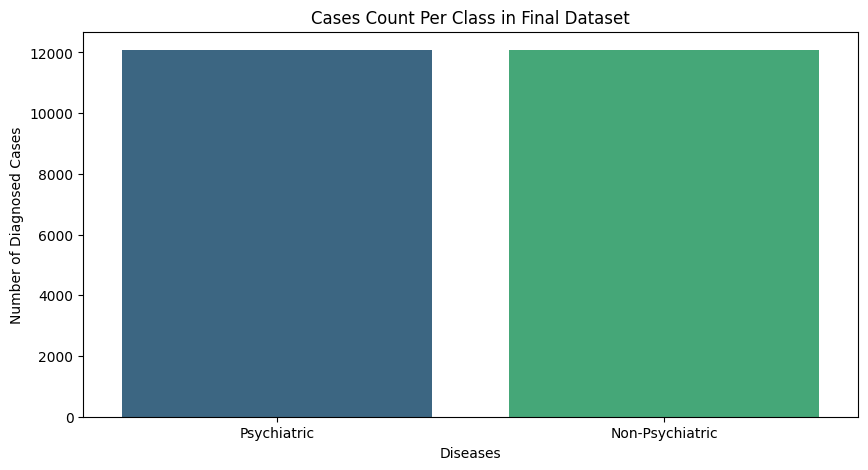

In [ ]:
# Cases per class in final dataset

%matplotlib inline

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x= 'Disease', y= 'Count', data= df_count, palette='viridis')

# Add labels and title
plt.xlabel("Diseases")
plt.ylabel("Number of Diagnosed Cases")
plt.title("Cases Count Per Class in Final Dataset")

# Rotate x labels for better readability if needed
#plt.xticks(rotation=45)

# Show the plot
plt.show()

### Data cleaning

In [ ]:
# Calculating percentage of NA values in each column

NA_percentage_columns = (df_data_psychiatric.isna().sum() / len(df_data_psychiatric)) * 100


In [ ]:
# Filter columns with more than 50% NA values

columns_with_high_NA = NA_percentage_columns[NA_percentage_columns > 50].index.tolist()

print("Columns with more than 50% NA values: \n", columns_with_high_NA)

Columns with more than 50% NA values: 
 ['EstimatedBodyWeight', 'Bmi', 'SizeCm', 'DateTime', 'PrimaryAssessmentCirculationComment', 'ObservationCirculationComment', 'NoVitals', 'BloodGlucoseLevelOutOfRange', 'PainScale', 'Time-VitalTrendTablesIBPs', 'Systol', 'Diastol', 'Time-VitalTrendTablesRRs', 'RR', 'Time-VitalTrendTablesTemps', 'Temp', 'IbpSys-AssessVitalSignsDestination', 'DBP', 'IbpDia-AssessVitalSignsDestination', 'IbpSys', 'IbpDia', 'SBP-AssessVitalSignsDestination', 'DBP-AssessVitalSignsDestination', 'EcgLeadTransmissionComment', 'EcgCommentPrimaryAssessment', 'Naca', 'Comment-InjuryReason', 'LightReflexLeft', 'LightReflexRight', 'LightReflexLeft-Eyes', 'PupilLeft-Eyes', 'PupilRight-Eyes', 'StateOfConsciousness', 'TotalScore', 'PainScale-AssessVitalSignsDestination', 'LightReflexRight-Eyes', 'ChiefComplaintProvocation', 'EventBeginn', 'InfectionsList', 'RiscFactors', 'LastExcretion', 'LastMeal', 'ChiefComplaintSeverity', 'ChiefComplaintPalliation', 'ChiefComplaintQuality', 'C

In [ ]:
# Dropping columns having more than 50% NA values as these do not provide enough information to give any concrete inference

columns_to_drop = ['EstimatedBodyWeight', 'Bmi', 'SizeCm', 'DateTime', 'NoVitals', 'BloodGlucoseLevelOutOfRange', 'PainScale',
                  'Time-VitalTrendTablesIBPs', 'Time-VitalTrendTablesRRs', 'RR','Time-VitalTrendTablesTemps', 'Temp',
                   'EcgLeadTransmissionComment', 'EcgCommentPrimaryAssessment', 'Naca', 'LightReflexLeft', 'LightReflexRight',
                   'LightReflexLeft-Eyes', 'PupilLeft-Eyes', 'PupilRight-Eyes', 'StateOfConsciousness', 'TotalScore', 'PainScale-AssessVitalSignsDestination',
                   'LightReflexRight-Eyes','EventBeginn', 'InfectionsList', 'RiscFactors', 'LastExcretion', 'LastMeal', 'Mad-AssessVitalSignsDestination',
                   'Sensibility', 'text-ObjectivNeuroStates',
                   'Intervention', 'text-ExistingInterventions', 'Comment', 'Comment-AssessVitalSignsDestination', 'text-PrimaryAssesmentBleedings',
                   'OtherText-ProvidersImpressions', 'Type-ProvidersImpressions', 'Text', 'Text-TrendDefibNotes', 'Comment-BloodgasVitals',
                   'text-ObjectivBleedings', 'text-ObjectivCirculationOthers', 'text-ObjectivCirculations', 'text-ObjectivSkinAssessments',
                   'text-PriAssesmentCircOthers', 'text-PriAssesmentCirculations', 'PrimaryAssessmentCirculationComment',
                   'ObservationCirculationComment', 'ObservationCirculationComment', 'Comment-InjuryReason', 'ChiefComplaintProvocation',
                   'ChiefComplaintSeverity', 'ChiefComplaintPalliation', 'ChiefComplaintQuality', 'ChiefComplaintRegion', 'ChiefComplaintChronsequence',
                   'ChiefComplaintChronstatus', 'PsychologicalConditionComment', 'NeurologyComment','NeurologyComment-AssessmentExamDest',
                   'ObservationPsychologicalConditionComment', 'DateTime-AssessVitalSignsDestination', 'Time-VitalTrendTablesPulses',
                   'Time-VitalTrendTablesSpO2s', 'text-PriAssesmentNeuroStates', 'PulseRhythm', 'SBP-AssessVitalSignsDestination','IbpSys-AssessVitalSignsDestination',
                  'IbpSys', 'SBP','Diastol',  'DBP','IbpDia-AssessVitalSignsDestination', 'IbpDia','DBP-AssessVitalSignsDestination','text-ObjectivEcgs','Psychiatric diseases',
                  'Group', 'MainDiagnosis','OpenEyes','CardiacArrest','text-PrimaryAssesmentResperations','text-PriAssesmentSkin','IllnessType','InjuryDetail','Pulse','SpO2','BestVerbalReaction','BestMotorReaction','text-PrimaryAssesmentPsyches','text-ObjectivNeuroAbnorms', 'text-PrimaryAssesmentEcgs',
                  'Systol', 'Medication', 'PreIllness', 'text-ObjectivPsyches', 'text-PriAssesmentNeuroAbnorms']

df_data_psychiatric = df_data_psychiatric.drop(columns_to_drop, axis = 'columns')
df_data_non_psychiatric = df_data_non_psychiatric.drop(columns_to_drop, axis = 'columns')

In [ ]:
# Function to remove brackets and retain only text in the column

def clean_columns(dataframe, column_names):
    for column_name in column_names:
        # Check for NA values
        na_mask = dataframe[column_name].isna()

        # Remove brackets where data is not NA
        dataframe.loc[~na_mask, column_name] = dataframe.loc[~na_mask, column_name].str.replace(r'[\[\]]', '', regex=True)

In [ ]:
# Removing brackets

clean_columns(df_data_psychiatric, df_data_psychiatric.columns)
clean_columns(df_data_non_psychiatric, df_data_non_psychiatric.columns)

In [ ]:
# Filling NA values

df_data_psychiatric.ChiefComplaintNarrative = df_data_psychiatric.ChiefComplaintNarrative.fillna('Unbekannt')
df_data_psychiatric.AnamneseInfo = df_data_psychiatric.AnamneseInfo.fillna('Unbekannt')

df_data_non_psychiatric.ChiefComplaintNarrative = df_data_non_psychiatric.ChiefComplaintNarrative.fillna('Unbekannt')
df_data_non_psychiatric.AnamneseInfo = df_data_non_psychiatric.AnamneseInfo.fillna('Unbekannt')

In [ ]:
df_data_psychiatric.head(10)

,case,ChiefComplaintNarrative,AnamneseInfo
0,00017976-caf1-4900-b7e9-90a197b713cf,Unbekannt,'Patient liegend vorm eingang kaufland wach un...
1,000b1628-4658-480c-9d44-24866a6e14bd,"'Bewusstseinsstörung,'",'Pat auf dem Boden liegend nicht erweckbar mit...
2,00257d7d-3ab0-4267-80da-fb4c8c065654,"'Bewusstseinsstörung,'",'Pat auf Bank sitzend vorgefunden. Auf Schmerz...
3,00441000-ec3e-438b-b591-3a04c2265380,"'AZ-Verschlechterung,'",'Patient mit unspezifischen Rücken/Flankenschm...
4,00684f98-ea13-4a3f-9a4b-4e3734527d7f,"'Agitation (krankhafte Unruhe),'",'Pat. Liegend auf strasse vorgefunden. Nicht a...
5,00696dfb-cf47-4f88-a7c8-f3f48db9515a,"'AZ-Verschlechterung,'","'Wird nicht richtig wach, ist weckbar, vermutl..."
6,00abc221-57bf-4ba7-a82c-1ca63be0c3f2,'PPsychischer Ausnahmezustand','Pat. im Bett liegend angetroffen. Wach und an...
7,00bcf57f-b6b1-4df1-ba3b-ff6d2c7d2199,"'AZ-Verschlechterung,'",'Pat. liegend in Bett vorgefunden. Laut Pflege...
8,00dd17b8-004c-4262-aebe-b4a2b4338532,"'AZ-Verschlechterung,'","'Bekannter CA Pat mit erneuter Panikatacke, Pa..."
9,01011974-b94a-437f-92f1-0d08d91c6cae,"'Bewusstseinsstörung,'",'Patient liegt auf dem Boden draußen. Mit Freu...


In [ ]:
# Function to remove punctuations

def remove_punctuation(text):
    # Check for NA values
    if pd.isna(text):
        return text
    return text.translate(str.maketrans('', '', string.punctuation))

# Cleaning dataset

Columns_to_process = ['ChiefComplaintNarrative','AnamneseInfo']

for column in Columns_to_process:
    df_data_psychiatric[column] = df_data_psychiatric[column].apply(lambda x: remove_punctuation(x) if isinstance(x, str) else x)
    df_data_non_psychiatric[column] = df_data_non_psychiatric[column].apply(lambda x: remove_punctuation(x) if isinstance(x, str) else x)


In [ ]:
df_data_psychiatric.columns

Index(['case', 'ChiefComplaintNarrative', 'AnamneseInfo'], dtype='object')

In [ ]:
df_data_psychiatric.shape

(12079, 3)

In [ ]:
df_data_psychiatric.head()

,case,ChiefComplaintNarrative,AnamneseInfo
0,00017976-caf1-4900-b7e9-90a197b713cf,Unbekannt,Patient liegend vorm eingang kaufland wach und...
1,000b1628-4658-480c-9d44-24866a6e14bd,Bewusstseinsstörung,Pat auf dem Boden liegend nicht erweckbar mit ...
2,00257d7d-3ab0-4267-80da-fb4c8c065654,Bewusstseinsstörung,Pat auf Bank sitzend vorgefunden Auf Schmerzre...
3,00441000-ec3e-438b-b591-3a04c2265380,AZVerschlechterung,Patient mit unspezifischen RückenFlankenschmer...
4,00684f98-ea13-4a3f-9a4b-4e3734527d7f,Agitation krankhafte Unruhe,Pat Liegend auf strasse vorgefunden Nicht ansp...


In [ ]:
df_data_non_psychiatric.columns

Index(['case', 'ChiefComplaintNarrative', 'AnamneseInfo'], dtype='object')

In [ ]:
df_data_non_psychiatric.shape

(12079, 3)

In [ ]:
df_data_non_psychiatric.head()

,case,ChiefComplaintNarrative,AnamneseInfo
41743,de302b06-76c3-45d9-ba83-27d4913ff9cc,Schmerzen BWSnSchmerzen LWSnSchmerzen Brust,Pat auf dem Bett sitzend vorgefunden wach ansp...
31302,a6a7e17f-9a64-4ac2-b3a5-01932aad5ca3,Schmerzen obere Extremitäten,Sportunfall Pat auf Kunstrasenplatz liegend v...
8191,2c015d05-5dd1-431e-b5f5-b153fe997527,BewusstseinsstörungnSchmerzen KopfnSchmerzen H...,Pat im Wohnzimmer liegend vorgefunden Couch wa...
2203,0bc93992-e23d-4540-889d-977d41d09d09,Schmerzen BauchnSchmerzen BrustnÜbelkeitnErbre...,Pat sitzend vorgefunden wach ansprechbar orien...
26425,8cbda146-5444-48e4-9f43-c44bdaa0658d,Unwohlsein Übelkeit AZVerschlechterung,Pat kommt Fussläufig auf die Wache gibt an das...


In [ ]:
# Creating labels

df_data_psychiatric['y'] = 1
df_data_non_psychiatric['y'] = 0

In [ ]:
# Concatenating Non-psychiatric and Psychiatric dataframes to form final dataset

dataset = pd.concat([df_data_psychiatric,df_data_non_psychiatric], ignore_index=True)

In [ ]:
dataset.columns

Index(['case', 'ChiefComplaintNarrative', 'AnamneseInfo', 'y'], dtype='object')

In [ ]:
dataset.head()

,case,ChiefComplaintNarrative,AnamneseInfo,y
0,00017976-caf1-4900-b7e9-90a197b713cf,Unbekannt,Patient liegend vorm eingang kaufland wach und...,1
1,000b1628-4658-480c-9d44-24866a6e14bd,Bewusstseinsstörung,Pat auf dem Boden liegend nicht erweckbar mit ...,1
2,00257d7d-3ab0-4267-80da-fb4c8c065654,Bewusstseinsstörung,Pat auf Bank sitzend vorgefunden Auf Schmerzre...,1
3,00441000-ec3e-438b-b591-3a04c2265380,AZVerschlechterung,Patient mit unspezifischen RückenFlankenschmer...,1
4,00684f98-ea13-4a3f-9a4b-4e3734527d7f,Agitation krankhafte Unruhe,Pat Liegend auf strasse vorgefunden Nicht ansp...,1


In [ ]:
# Removing white spaces

strip_white_space_columns = ['ChiefComplaintNarrative','AnamneseInfo']

for column in strip_white_space_columns:
    dataset[column] = dataset[column].str.strip()

dataset.head()

,case,ChiefComplaintNarrative,AnamneseInfo,y
0,00017976-caf1-4900-b7e9-90a197b713cf,Unbekannt,Patient liegend vorm eingang kaufland wach und...,1
1,000b1628-4658-480c-9d44-24866a6e14bd,Bewusstseinsstörung,Pat auf dem Boden liegend nicht erweckbar mit ...,1
2,00257d7d-3ab0-4267-80da-fb4c8c065654,Bewusstseinsstörung,Pat auf Bank sitzend vorgefunden Auf Schmerzre...,1
3,00441000-ec3e-438b-b591-3a04c2265380,AZVerschlechterung,Patient mit unspezifischen RückenFlankenschmer...,1
4,00684f98-ea13-4a3f-9a4b-4e3734527d7f,Agitation krankhafte Unruhe,Pat Liegend auf strasse vorgefunden Nicht ansp...,1


In [ ]:
# Concatenate all text features into a single string per row

dataset['Combined_Text'] = dataset[['ChiefComplaintNarrative','AnamneseInfo']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [ ]:
dataset.head()

,case,ChiefComplaintNarrative,AnamneseInfo,y,Combined_Text
0,00017976-caf1-4900-b7e9-90a197b713cf,Unbekannt,Patient liegend vorm eingang kaufland wach und...,1,Unbekannt Patient liegend vorm eingang kauflan...
1,000b1628-4658-480c-9d44-24866a6e14bd,Bewusstseinsstörung,Pat auf dem Boden liegend nicht erweckbar mit ...,1,Bewusstseinsstörung Pat auf dem Boden liegend ...
2,00257d7d-3ab0-4267-80da-fb4c8c065654,Bewusstseinsstörung,Pat auf Bank sitzend vorgefunden Auf Schmerzre...,1,Bewusstseinsstörung Pat auf Bank sitzend vorge...
3,00441000-ec3e-438b-b591-3a04c2265380,AZVerschlechterung,Patient mit unspezifischen RückenFlankenschmer...,1,AZVerschlechterung Patient mit unspezifischen ...
4,00684f98-ea13-4a3f-9a4b-4e3734527d7f,Agitation krankhafte Unruhe,Pat Liegend auf strasse vorgefunden Nicht ansp...,1,Agitation krankhafte Unruhe Pat Liegend auf st...


In [ ]:
# Dropping columns

dataset = dataset.drop(['ChiefComplaintNarrative','AnamneseInfo'], axis = 'columns')

In [ ]:
# Rearrange the column order

target = dataset.pop('y')
dataset.insert(2, 'y', target )

In [ ]:
# Final dataset

dataset.head()

,case,Combined_Text,y
0,00017976-caf1-4900-b7e9-90a197b713cf,Unbekannt Patient liegend vorm eingang kauflan...,1
1,000b1628-4658-480c-9d44-24866a6e14bd,Bewusstseinsstörung Pat auf dem Boden liegend ...,1
2,00257d7d-3ab0-4267-80da-fb4c8c065654,Bewusstseinsstörung Pat auf Bank sitzend vorge...,1
3,00441000-ec3e-438b-b591-3a04c2265380,AZVerschlechterung Patient mit unspezifischen ...,1
4,00684f98-ea13-4a3f-9a4b-4e3734527d7f,Agitation krankhafte Unruhe Pat Liegend auf st...,1


### Text Parsing

In [ ]:
# Importing NLTK library

!pip install nltk

#nltk.download('punkt')

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import GermanStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import bigrams, trigrams
from nltk.probability import FreqDist

In [ ]:
df_data_psychiatric.columns

Index(['case', 'ChiefComplaintNarrative', 'AnamneseInfo', 'y'], dtype='object')

In [ ]:
# Creating new dataframe to extract features

df_features = df_data_psychiatric[['ChiefComplaintNarrative','AnamneseInfo']].copy()

In [ ]:
df_features.head()

,ChiefComplaintNarrative,AnamneseInfo
0,Unbekannt,Patient liegend vorm eingang kaufland wach und...
1,Bewusstseinsstörung,Pat auf dem Boden liegend nicht erweckbar mit ...
2,Bewusstseinsstörung,Pat auf Bank sitzend vorgefunden Auf Schmerzre...
3,AZVerschlechterung,Patient mit unspezifischen RückenFlankenschmer...
4,Agitation krankhafte Unruhe,Pat Liegend auf strasse vorgefunden Nicht ansp...


In [ ]:
# NA Value check

NA_values_features =df_features.isna().sum()
print(NA_values_features)

ChiefComplaintNarrative    0
AnamneseInfo               0
dtype: int64


In [ ]:
# Concatenate all text features into a single string per row

df_features.loc[:,'Combined_Text'] = df_features.apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [ ]:
df_features.head()

,ChiefComplaintNarrative,AnamneseInfo,Combined_Text
0,Unbekannt,Patient liegend vorm eingang kaufland wach und...,Unbekannt Patient liegend vorm eingang kauflan...
1,Bewusstseinsstörung,Pat auf dem Boden liegend nicht erweckbar mit ...,Bewusstseinsstörung Pat auf dem Boden liegend ...
2,Bewusstseinsstörung,Pat auf Bank sitzend vorgefunden Auf Schmerzre...,Bewusstseinsstörung Pat auf Bank sitzend vorge...
3,AZVerschlechterung,Patient mit unspezifischen RückenFlankenschmer...,AZVerschlechterung Patient mit unspezifischen ...
4,Agitation krankhafte Unruhe,Pat Liegend auf strasse vorgefunden Nicht ansp...,Agitation krankhafte Unruhe Pat Liegend auf st...


In [ ]:
# Load German stop words
nltk.download('stopwords')
german_stop_words = set(stopwords.words('german'))

# Initialize the German Language stemmer
german_stemmer = GermanStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Removing Stop-words and Lemmatization

# Required library for german text
nltk.download('punkt_tab')

def preprocess_text(text):
    # Tokenizing the text
    words = word_tokenize(text, language='german')

    #processed_words = [word for word in words if word.lower() not in german_stop_words]
    processed_words = [german_stemmer.stem(word) for word in words if word.lower() not in german_stop_words]

    # Join the words back into a single string
    processed_text = ' '.join(processed_words)

    return processed_text

df_features['Combined_Text'] = df_features['Combined_Text'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Lower casing the processed text

df_features.Combined_Text = df_features.Combined_Text.str.lower()

In [ ]:
df_features.head()

,ChiefComplaintNarrative,AnamneseInfo,Combined_Text
0,Unbekannt,Patient liegend vorm eingang kaufland wach und...,unbekannt patient liegend vorm eingang kauflan...
1,Bewusstseinsstörung,Pat auf dem Boden liegend nicht erweckbar mit ...,bewusstseinsstor pat bod liegend erweckbar arz...
2,Bewusstseinsstörung,Pat auf Bank sitzend vorgefunden Auf Schmerzre...,bewusstseinsstor pat bank sitzend vorgefund sc...
3,AZVerschlechterung,Patient mit unspezifischen RückenFlankenschmer...,azverschlechter patient unspezif ruckenflanken...
4,Agitation krankhafte Unruhe,Pat Liegend auf strasse vorgefunden Nicht ansp...,agitation krankhaft unruh pat liegend strass v...


## Feature Engineering

### Word Frequency Analysis in Psychiatric Data

In [ ]:
# Tokenizing the text in Combined Text column

df_features['Tokenized_Text'] = df_features.Combined_Text.apply(lambda x: word_tokenize(x , language='german'))
df_features['Bigrams'] = df_features['Tokenized_Text'].apply(lambda x: bigrams(x))

In [ ]:
df_features.head()

,ChiefComplaintNarrative,AnamneseInfo,Combined_Text,Tokenized_Text,Bigrams
0,Unbekannt,Patient liegend vorm eingang kaufland wach und...,unbekannt patient liegend vorm eingang kauflan...,"[unbekannt, patient, liegend, vorm, eingang, k...",<generator object bigrams at 0x7a72dc400580>
1,Bewusstseinsstörung,Pat auf dem Boden liegend nicht erweckbar mit ...,bewusstseinsstor pat bod liegend erweckbar arz...,"[bewusstseinsstor, pat, bod, liegend, erweckba...",<generator object bigrams at 0x7a72dc400740>
2,Bewusstseinsstörung,Pat auf Bank sitzend vorgefunden Auf Schmerzre...,bewusstseinsstor pat bank sitzend vorgefund sc...,"[bewusstseinsstor, pat, bank, sitzend, vorgefu...",<generator object bigrams at 0x7a72dc400ba0>
3,AZVerschlechterung,Patient mit unspezifischen RückenFlankenschmer...,azverschlechter patient unspezif ruckenflanken...,"[azverschlechter, patient, unspezif, ruckenfla...",<generator object bigrams at 0x7a72dc400820>
4,Agitation krankhafte Unruhe,Pat Liegend auf strasse vorgefunden Nicht ansp...,agitation krankhaft unruh pat liegend strass v...,"[agitation, krankhaft, unruh, pat, liegend, st...",<generator object bigrams at 0x7a72dc400900>


In [ ]:
# Flattening the list of words
all_words = [word for words_list in df_features['Tokenized_Text'] for word in words_list]

# Flattening the list of bigrams
all_bigrams = [bigram for bigrams_list in df_features['Bigrams'] for bigram in bigrams_list]

In [ ]:
# Calculating word frequencies
freq_dist = FreqDist(all_words)

# Calculating bigram frequencies
bigram_freq_dist = FreqDist(all_bigrams)

In [ ]:
# Creating a DataFrame from the frequency distribution
freq_df = pd.DataFrame(list(freq_dist.items()), columns=['Word', 'Frequency1']).sort_values(by='Frequency1', ascending=False)

# Creating a DataFrame from the bigram frequency distribution
bigram_freq_df = pd.DataFrame(list(bigram_freq_dist.items()), columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False)


In [ ]:
# Printing Unigrams

top_20_unigrams = freq_df[:20]
print(top_20_unigrams)

                 Word  Frequency1
14                pat       12881
159         psychisch        4356
112   ausnahmezustand        3757
60          vorgefund        2966
6                wach        2630
102       ansprechbar        2465
359              seit        2209
1             patient        2197
13   bewusstseinsstor        2094
476           polizei        2079
2             liegend        1987
0           unbekannt        1840
146              heut        1783
209          eintreff        1715
59            sitzend        1699
162           alkohol        1672
86            schmerz        1668
470         patientin        1662
135           bekannt        1555
130              wurd        1548


In [ ]:
# Printing Bigrams

top_20_bigrams = bigram_freq_df[:20]

# Convert bigrams from tuples to strings
top_20_bigrams['Bigram'] = top_20_bigrams['Bigram'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x)

print(top_20_bigrams)

                         Bigram  Frequency
392   psychisch ausnahmezustand       3542
120         ausnahmezustand pat       1720
125            wach ansprechbar       1637
272                    pat wach        778
12         bewusstseinsstor pat        772
251           liegend vorgefund        746
61            sitzend vorgefund        637
103         agitation krankhaft        616
104             krankhaft unruh        608
877      ansprechbar orientiert        548
261                 eintreff rd        499
2288                pat sitzend        422
1308        stark alkoholisiert        421
170                   heut morg        406
341               unbekannt pat        395
190             alkohol getrunk        383
162         azverschlechter pat        380
580              vorgefund wach        349
106                 pat liegend        341
782                   eig angab        325


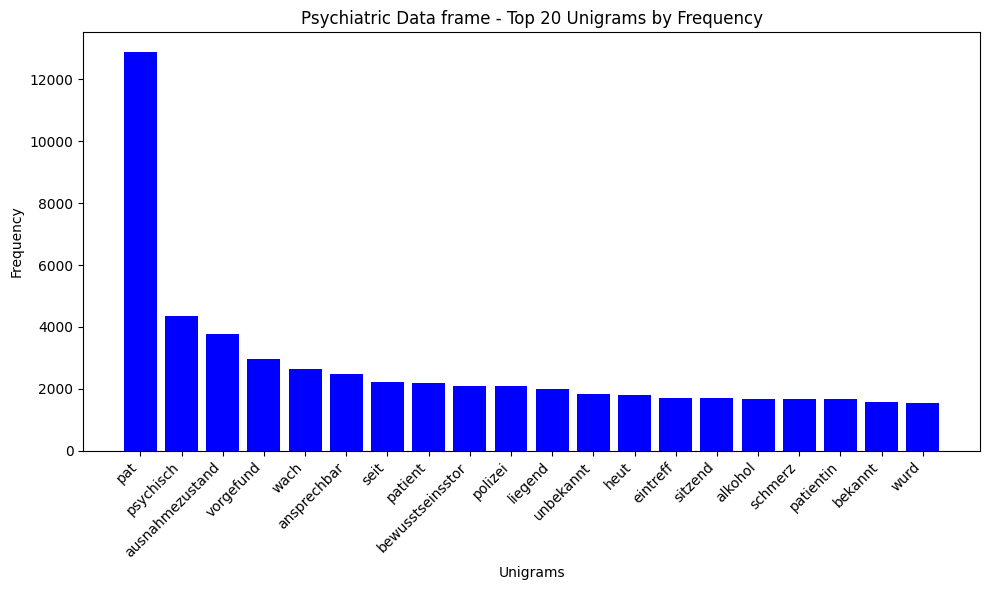

In [ ]:
# Plotting unigrams

plt.figure(figsize=(10, 6))
plt.bar(top_20_unigrams['Word'], top_20_unigrams['Frequency1'], color='blue')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Psychiatric Data frame - Top 20 Unigrams by Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

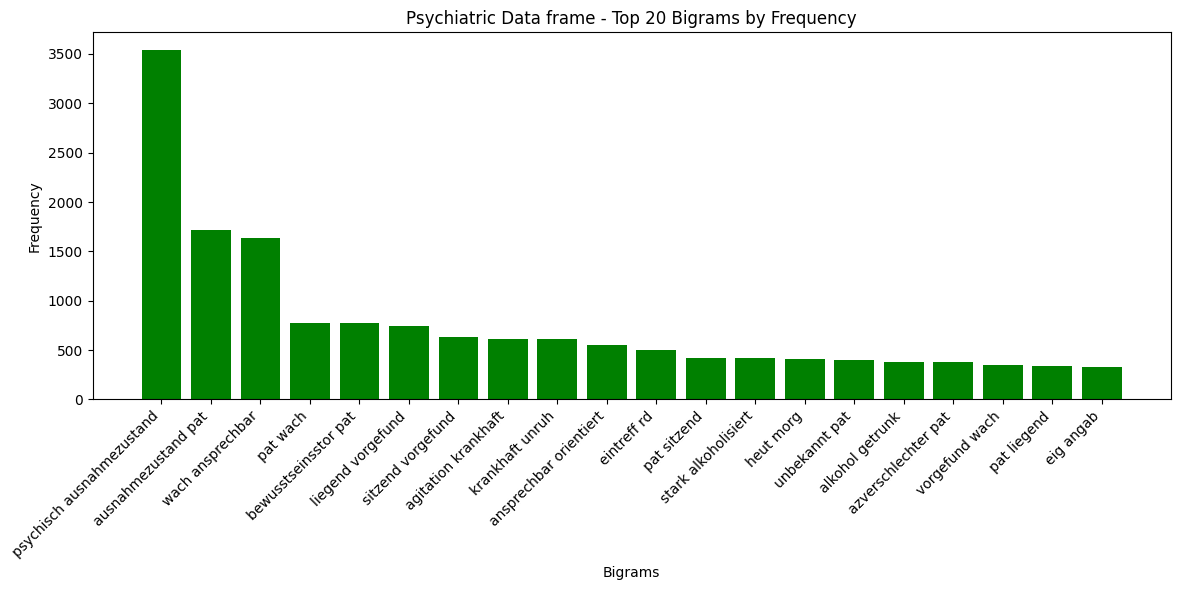

In [ ]:
# Plotting bigrams

plt.figure(figsize=(12, 6))
plt.bar(top_20_bigrams['Bigram'], top_20_bigrams['Frequency'], color='green')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Psychiatric Data frame - Top 20 Bigrams by Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Word Frequency Analysis in non-psychiatric Data

In [ ]:
# Creating new dataframe to extract features

df_features_non = df_data_non_psychiatric[['ChiefComplaintNarrative','AnamneseInfo']].copy()

In [ ]:
df_features_non.head()

,ChiefComplaintNarrative,AnamneseInfo
41743,Schmerzen BWSnSchmerzen LWSnSchmerzen Brust,Pat auf dem Bett sitzend vorgefunden wach ansp...
31302,Schmerzen obere Extremitäten,Sportunfall Pat auf Kunstrasenplatz liegend v...
8191,BewusstseinsstörungnSchmerzen KopfnSchmerzen H...,Pat im Wohnzimmer liegend vorgefunden Couch wa...
2203,Schmerzen BauchnSchmerzen BrustnÜbelkeitnErbre...,Pat sitzend vorgefunden wach ansprechbar orien...
26425,Unwohlsein Übelkeit AZVerschlechterung,Pat kommt Fussläufig auf die Wache gibt an das...


In [ ]:
# Resetting the indices of the cases

df_features_non = df_features_non.reset_index(drop = True)

In [ ]:
df_features_non.head()

,ChiefComplaintNarrative,AnamneseInfo
0,Schmerzen BWSnSchmerzen LWSnSchmerzen Brust,Pat auf dem Bett sitzend vorgefunden wach ansp...
1,Schmerzen obere Extremitäten,Sportunfall Pat auf Kunstrasenplatz liegend v...
2,BewusstseinsstörungnSchmerzen KopfnSchmerzen H...,Pat im Wohnzimmer liegend vorgefunden Couch wa...
3,Schmerzen BauchnSchmerzen BrustnÜbelkeitnErbre...,Pat sitzend vorgefunden wach ansprechbar orien...
4,Unwohlsein Übelkeit AZVerschlechterung,Pat kommt Fussläufig auf die Wache gibt an das...


In [ ]:
# NA Value check

NA = df_features_non.isna().sum()
print(NA)

ChiefComplaintNarrative    0
AnamneseInfo               0
dtype: int64


In [ ]:
# Concatenating all text features into a single string per row

df_features_non.loc[:,'Combined_Text'] = df_features_non.apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [ ]:
df_features_non.head()

,ChiefComplaintNarrative,AnamneseInfo,Combined_Text
0,Schmerzen BWSnSchmerzen LWSnSchmerzen Brust,Pat auf dem Bett sitzend vorgefunden wach ansp...,Schmerzen BWSnSchmerzen LWSnSchmerzen Brust Pa...
1,Schmerzen obere Extremitäten,Sportunfall Pat auf Kunstrasenplatz liegend v...,Schmerzen obere Extremitäten Sportunfall Pat ...
2,BewusstseinsstörungnSchmerzen KopfnSchmerzen H...,Pat im Wohnzimmer liegend vorgefunden Couch wa...,BewusstseinsstörungnSchmerzen KopfnSchmerzen H...
3,Schmerzen BauchnSchmerzen BrustnÜbelkeitnErbre...,Pat sitzend vorgefunden wach ansprechbar orien...,Schmerzen BauchnSchmerzen BrustnÜbelkeitnErbre...
4,Unwohlsein Übelkeit AZVerschlechterung,Pat kommt Fussläufig auf die Wache gibt an das...,Unwohlsein Übelkeit AZVerschlechterung Pat kom...


In [ ]:
# Processing combined features text

df_features_non['Combined_Text'] = df_features_non['Combined_Text'].apply(preprocess_text)

In [ ]:
df_features_non.head()

,ChiefComplaintNarrative,AnamneseInfo,Combined_Text
0,Schmerzen BWSnSchmerzen LWSnSchmerzen Brust,Pat auf dem Bett sitzend vorgefunden wach ansp...,schmerz bwsnschmerz lwsnschmerz brust pat bett...
1,Schmerzen obere Extremitäten,Sportunfall Pat auf Kunstrasenplatz liegend v...,schmerz ober extremitat sportunfall pat kunstr...
2,BewusstseinsstörungnSchmerzen KopfnSchmerzen H...,Pat im Wohnzimmer liegend vorgefunden Couch wa...,bewusstseinsstorungnschmerz kopfnschmerz hwsns...
3,Schmerzen BauchnSchmerzen BrustnÜbelkeitnErbre...,Pat sitzend vorgefunden wach ansprechbar orien...,schmerz bauchnschmerz brustnubelkeitnerbrech p...
4,Unwohlsein Übelkeit AZVerschlechterung,Pat kommt Fussläufig auf die Wache gibt an das...,unwohlsein ubel azverschlechter pat kommt fuss...


In [ ]:
# Lowering case of the text

df_features_non.Combined_Text = df_features_non.Combined_Text.str.lower()

In [ ]:
# Tokenizing text in Combined Text column

df_features_non['Tokenized_Text'] = df_features_non.Combined_Text.apply(lambda x: word_tokenize(x , language='german'))
df_features_non['Bigrams'] = df_features_non['Tokenized_Text'].apply(lambda x: bigrams(x))

In [ ]:
df_features_non.head()

,ChiefComplaintNarrative,AnamneseInfo,Combined_Text,Tokenized_Text,Bigrams
0,Schmerzen BWSnSchmerzen LWSnSchmerzen Brust,Pat auf dem Bett sitzend vorgefunden wach ansp...,schmerz bwsnschmerz lwsnschmerz brust pat bett...,"[schmerz, bwsnschmerz, lwsnschmerz, brust, pat...",<generator object bigrams at 0x7a72d8b2edc0>
1,Schmerzen obere Extremitäten,Sportunfall Pat auf Kunstrasenplatz liegend v...,schmerz ober extremitat sportunfall pat kunstr...,"[schmerz, ober, extremitat, sportunfall, pat, ...",<generator object bigrams at 0x7a72d8b2f060>
2,BewusstseinsstörungnSchmerzen KopfnSchmerzen H...,Pat im Wohnzimmer liegend vorgefunden Couch wa...,bewusstseinsstorungnschmerz kopfnschmerz hwsns...,"[bewusstseinsstorungnschmerz, kopfnschmerz, hw...",<generator object bigrams at 0x7a72d8b2e960>
3,Schmerzen BauchnSchmerzen BrustnÜbelkeitnErbre...,Pat sitzend vorgefunden wach ansprechbar orien...,schmerz bauchnschmerz brustnubelkeitnerbrech p...,"[schmerz, bauchnschmerz, brustnubelkeitnerbrec...",<generator object bigrams at 0x7a72d8b2f140>
4,Unwohlsein Übelkeit AZVerschlechterung,Pat kommt Fussläufig auf die Wache gibt an das...,unwohlsein ubel azverschlechter pat kommt fuss...,"[unwohlsein, ubel, azverschlechter, pat, kommt...",<generator object bigrams at 0x7a72d8b2eea0>


In [ ]:
df_features_non.shape

(12079, 5)

In [ ]:
# Flattening the list of words
all_words_non = [word for words_list in df_features_non['Tokenized_Text'] for word in words_list]

# Flattening the list of bigrams
all_bigrams_non = [bigram for bigrams_list in df_features_non['Bigrams'] for bigram in bigrams_list]

In [ ]:
# Calculating word frequencies
freq_dist_non = FreqDist(all_words_non)

# Calculating bigram frequencies
bigram_freq_dist_non = FreqDist(all_bigrams_non)

In [ ]:
# Creating a DataFrame from the frequency distribution
freq_df_non = pd.DataFrame(list(freq_dist_non.items()), columns=['Word', 'Frequency0']).sort_values(by='Frequency0', ascending=False)

# Creating a DataFrame from the bigram frequency distribution
bigram_freq_df_non = pd.DataFrame(list(bigram_freq_dist_non.items()), columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False)

In [ ]:
# Printing Unigrams

Top_20_unigram_non = freq_df_non[:20]
print(Top_20_unigram_non)

                Word  Frequency0
4                pat       16158
0            schmerz       11408
12              seit        5742
8               wach        4840
9        ansprechbar        4352
7          vorgefund        3882
10        orientiert        3718
30              heut        3041
6            sitzend        2962
96           liegend        2843
13                ca        2745
391         eintreff        2554
375           leicht        2496
655             link        2388
286        angetroff        2383
247        schwindel        2286
242  azverschlechter        2285
70              gibt        2103
545            recht        2092
205             ubel        2069


In [ ]:
# Printing Bigrams

top_20_bigrams_non = bigram_freq_df_non[:20]

# Convert bigrams from tuples to strings
top_20_bigrams_non['Bigram'] = top_20_bigrams_non['Bigram'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x)

print(top_20_bigrams_non)


                      Bigram  Frequency
8           wach ansprechbar       3479
9     ansprechbar orientiert       1763
1236                pat wach       1600
1480             eintreff rd       1162
33                 heut morg       1126
904            schmerz bauch       1089
109        liegend vorgefund       1054
6          sitzend vorgefund       1045
7             vorgefund wach        938
559            schmerz brust        899
12                   seit ca        833
263              pat sitzend        789
4466            bett liegend        685
1141             schmerz unt        677
170           unt extremitat        671
2284               seit heut        668
397                seit gest        615
2106            schmerz kopf        598
1044           stark schmerz        593
333      azverschlechter pat        590


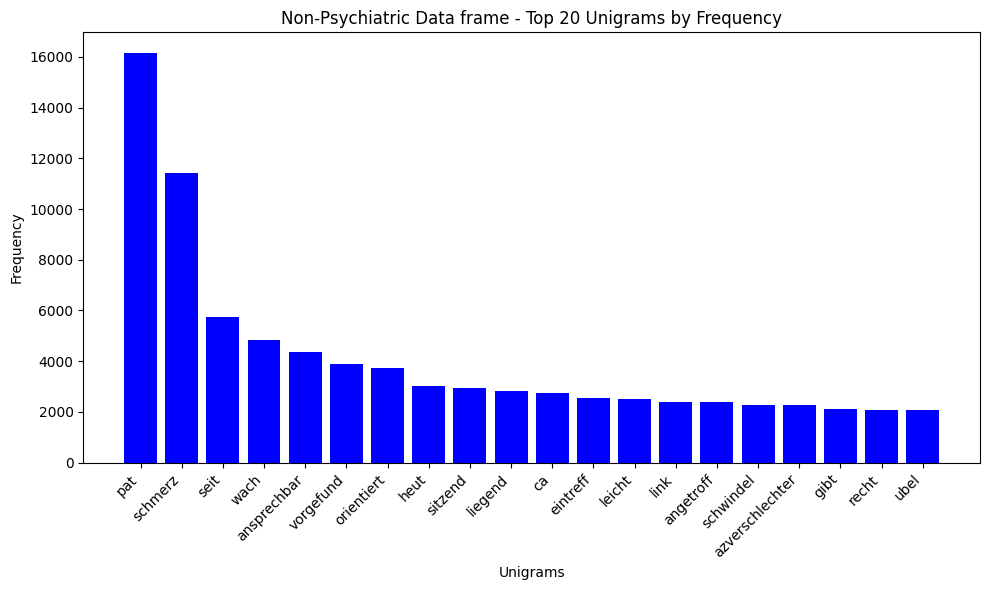

In [ ]:
# Plotting unigrams

plt.figure(figsize=(10, 6))
plt.bar(Top_20_unigram_non['Word'], Top_20_unigram_non['Frequency0'], color='blue')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Non-Psychiatric Data frame - Top 20 Unigrams by Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

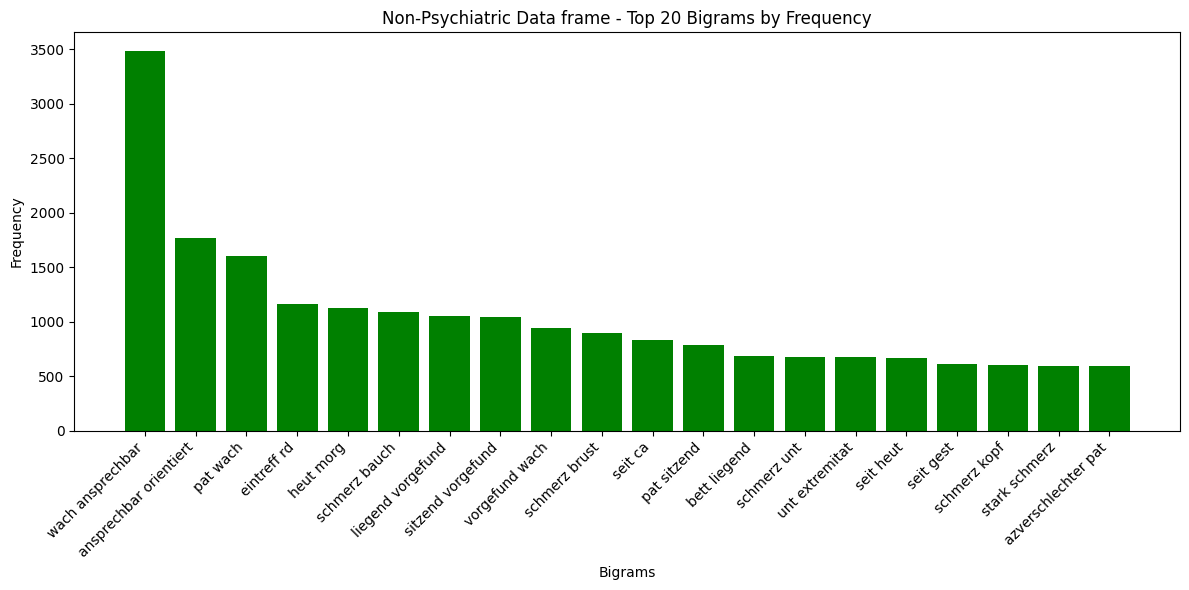

In [ ]:
# Plotting bigrams

plt.figure(figsize=(12, 6))
plt.bar(top_20_bigrams_non['Bigram'], top_20_bigrams_non['Frequency'], color='green')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Non-Psychiatric Data frame - Top 20 Bigrams by Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Comparative Word Frequency Distribution: Psychiatric vs. Non-Psychiatric Labels

Here a comparison is made between the frequency of occurence of the selected vocabulary in relation to both the labels. From frequency difference, correlation of the words to a particular label (0 or 1) can be found out.

In [ ]:
# Defining dataframe "df_True" having potential vocabulary words and their fequency in the psychiatric dataset

New_vocab_true = {
    'Word' : ['psychischer','ausnahmezustand','alkohol','bewusstseinsstörung', 'azverschlechterung','unruhe'],
    'Frequency1' : [3584,3742,1559,2086,962, 856]
}
df_True = pd.DataFrame(New_vocab_true)

In [ ]:
# Defining dataframe "df_False" having potential vocabulary words and their fequency in the non-psychiatric dataset

New_vocab_false = {
    'Word' : ['schmerzen', 'nauffälligkeiten', 'azverschlechterung', 'schwindel', 'übelkeit', 'dyspnoe', 'unwohlsein', 'verlangsamt', 'bewusstseinsstörung', 'ängstlich', 'fieber', 'kopfschmerzen', 'sprachstörung', 'wortfindungsstörung', 'hypertonie', 'atemnot', 'extremitäten', 'kopf', 'brust'],
    'Frequency0' : [10592, 2710, 2302, 2154, 2029, 1173, 1065, 1063, 1030, 978, 835, 757, 536, 498, 492, 1483, 1387, 1242, 1237]

}
df_False = pd.DataFrame(New_vocab_false)

In [ ]:
# Merging DataFrames on 'word'

merged_df = pd.merge(df_True, df_False, on='Word', how='outer', suffixes=('1','0')).fillna(0)

In [ ]:
print(merged_df)

                   Word  Frequency1  Frequency0
0               alkohol      1559.0         0.0
1               atemnot         0.0      1483.0
2       ausnahmezustand      3742.0         0.0
3    azverschlechterung       962.0      2302.0
4   bewusstseinsstörung      2086.0      1030.0
5                 brust         0.0      1237.0
6               dyspnoe         0.0      1173.0
7          extremitäten         0.0      1387.0
8                fieber         0.0       835.0
9            hypertonie         0.0       492.0
10                 kopf         0.0      1242.0
11        kopfschmerzen         0.0       757.0
12     nauffälligkeiten         0.0      2710.0
13          psychischer      3584.0         0.0
14            schmerzen         0.0     10592.0
15            schwindel         0.0      2154.0
16        sprachstörung         0.0       536.0
17               unruhe       856.0         0.0
18           unwohlsein         0.0      1065.0
19          verlangsamt         0.0     

In [ ]:
# Calculating frequency difference between two labels for each word

if 'Frequency1' in merged_df.columns and 'Frequency0' in merged_df.columns:
    # Calculate frequency differences
    merged_df['frequency_difference'] = merged_df['Frequency1'] - merged_df['Frequency0']
    print("DataFrame with Frequency Differences:\n", merged_df)
else:
    raise KeyError("Expected column names 'Frequency1' and 'Frequency0' not found in the merged DataFrame.")

DataFrame with Frequency Differences:
                    Word  Frequency1  Frequency0  frequency_difference
0               alkohol      1559.0         0.0                1559.0
1               atemnot         0.0      1483.0               -1483.0
2       ausnahmezustand      3742.0         0.0                3742.0
3    azverschlechterung       962.0      2302.0               -1340.0
4   bewusstseinsstörung      2086.0      1030.0                1056.0
5                 brust         0.0      1237.0               -1237.0
6               dyspnoe         0.0      1173.0               -1173.0
7          extremitäten         0.0      1387.0               -1387.0
8                fieber         0.0       835.0                -835.0
9            hypertonie         0.0       492.0                -492.0
10                 kopf         0.0      1242.0               -1242.0
11        kopfschmerzen         0.0       757.0                -757.0
12     nauffälligkeiten         0.0      2710.0    

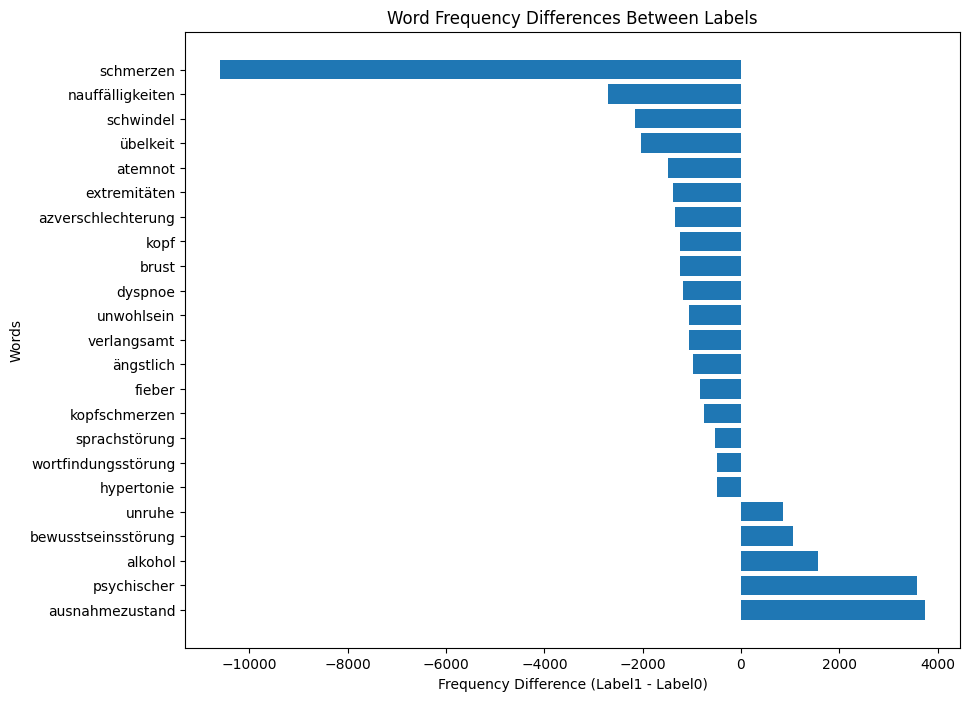

In [ ]:
# Words Vs Frequency difference Plot

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
merged_df.sort_values(by='frequency_difference', ascending=False, inplace=True)
plt.barh(merged_df['Word'], merged_df['frequency_difference'])
plt.xlabel('Frequency Difference (Label1 - Label0)')
plt.ylabel('Words')
plt.title('Word Frequency Differences Between Labels')
plt.show()

From the above plot inferences about the correlations can be made.

In [ ]:
# Vocabulary list for features based on the above assessment

vocabulary = ['alcohol', 'psychisch', 'ausnahmezustand', 'schwindel', 'azverschlechter', 'fieb', 'atemnot', 'unruh', 'suizidal']

### Contextual Text Analysis for Feature Selection

In addition to finding bigrams, here a functiion is implemented to check the most occuring words before and after the selected vocabulary to further improvise the feature selection

In [ ]:
# Function to find the words surrounding the vocabulary list in the text

def find_surrounding_words(text, target_word):

    # Regex pattern to capture the word before and after the target word
    pattern = r'\b(\w+)\b\s+' + re.escape(target_word) + r'\s+\b(\w+)\b'

    # Search for the pattern in the text
    match = re.search(pattern, text)

    if match:
        return match.group(1), match.group(2)  # Return the words before and after
    else:
        return None, None  # Return None if the target word is not found or has no surrounding words


In [ ]:
# Defining target word to look for
target_word = 'verwirrt'

# Applying find_surrounding_words function to df_features dataframe
df_features['before'], df_features['after'] = zip(*df_features['Combined_Text'].apply(lambda x: find_surrounding_words(x, target_word)))

In [ ]:
# Creating empty dataframes

words_before = pd.DataFrame(columns=['before'])
words_after = pd.DataFrame(columns=['after'])

In [ ]:
# Extracting words before and after the target word form the df_features_non dataframe
words_before['words'] = df_features['before']
words_after['words'] = df_features['after']


In [ ]:
# Converting to dataframe

df_words_before = pd.DataFrame(words_before)

In [ ]:
# Converting to dataframe

df_words_after = pd.DataFrame(words_after)

In [ ]:
# Printing Unique words and their counts

df_words_before.words.value_counts()

,count
words,
pat,18
wirkt,13
zunehm,13
stark,13
macht,12
...,...
npatientin,1
anfall,1
wanderplatz,1


In [ ]:
# Printing Unique words and their counts

df_words_after.words.value_counts()

,count
words,
eindruck,15
zustand,8
pat,6
unruh,6
strass,6
...,...
teilweis,1
schwindel,1
eingenasst,1


### RFECV

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [ ]:
# BOW vectorizer

vectorizer = CountVectorizer(vocabulary=Vocabulary)
X = vectorizer.fit_transform(text_column)

In [ ]:
# Using linear SVM classifier
classifier = SVC(kernel="linear")


# Set up RFECV with stratified k-fold cross-validation
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV to the data
rfecv.fit(X, target)

KeyboardInterrupt: 

In [ ]:
# Optimal number of features
optimal_features = rfecv.n_features_

# Support mask to get selected features
selected_features_mask = rfecv.support_

# Feature names from the vocabulary
selected_features = np.array(Vocabulary)[selected_features_mask]

print("Optimal number of features: ", optimal_features)
print("Selected features: ", selected_features)

### Finding synonyms of the vocabulary

In this section Levenshtein distance method is used to find synonyms or words similar to those in the vocabulary, to account for the variations in the text for similar context.


In [ ]:
# Importing Levenshtein

!pip install Levenshtein
from Levenshtein import distance

In [ ]:
# Function to find similar words to the words in the vocabulary

def is_similar(word1, word2, threshold=4):
    return distance(word1, word2) <= threshold

In [ ]:
# Dataframe containing 500 most frequent word in psychiatric dataset

frequent_words = freq_df[:500]

In [ ]:
# Printing similar words

similar_pairs = [] # initializing empty list to hold similar words

for vocab_word in vocabulary:
    for df_word in frequent_words['Word']:
        if is_similar(vocab_word, df_word):
            similar_pairs.append((vocab_word, df_word))

print("Similar word pairs:")

for pair in similar_pairs:
    print(pair)

## Final Dataset

In [ ]:
# Printing previously prepared dataset

dataset.head()

,case,Combined_Text,y
0,00017976-caf1-4900-b7e9-90a197b713cf,Unbekannt Patient liegend vorm eingang kauflan...,1
1,000b1628-4658-480c-9d44-24866a6e14bd,Bewusstseinsstörung Pat auf dem Boden liegend ...,1
2,00257d7d-3ab0-4267-80da-fb4c8c065654,Bewusstseinsstörung Pat auf Bank sitzend vorge...,1
3,00441000-ec3e-438b-b591-3a04c2265380,AZVerschlechterung Patient mit unspezifischen ...,1
4,00684f98-ea13-4a3f-9a4b-4e3734527d7f,Agitation krankhafte Unruhe Pat Liegend auf st...,1


In [ ]:
# Pre-processing the dataset before passing it to machine learning

dataset['Combined_Text'] = dataset['Combined_Text'].apply(preprocess_text)

In [ ]:
# Lower casing the text

dataset['Combined_Text'] = dataset['Combined_Text'].str.lower()

In [ ]:
dataset.head()

,case,Combined_Text,y
0,00017976-caf1-4900-b7e9-90a197b713cf,unbekannt patient liegend vorm eingang kauflan...,1
1,000b1628-4658-480c-9d44-24866a6e14bd,bewusstseinsstor pat bod liegend erweckbar arz...,1
2,00257d7d-3ab0-4267-80da-fb4c8c065654,bewusstseinsstor pat bank sitzend vorgefund sc...,1
3,00441000-ec3e-438b-b591-3a04c2265380,azverschlechter patient unspezif ruckenflanken...,1
4,00684f98-ea13-4a3f-9a4b-4e3734527d7f,agitation krankhaft unruh pat liegend strass v...,1


In [ ]:
# Defining word mappings to map synonyms together, found using is_similar function

Mappings = {
    'bewusstlos' : 'bewusstseinsstor',
    'bier' : 'alkohol',
    'psych' : 'psychisch',
    'alkoholintox' : 'alkohol',
    'vodka' : 'alkohol',
    'wodka' : 'alkohol',
    'wein' : 'alkohol',
    'alkoholkonsum' : 'alkohol',
    'alkoholabusus' : 'alkohol',
    'alkoholisiert' : 'alkohol',
    'agitation' : 'unruh',
    'aggressiv' : 'unruh',
    'stress' : 'unruh',
    'depression' : 'suizidal',
    'suizidgedank' : 'suizidal',
    'suizid' : 'suizidal',
    'suizidversuch' : 'suizidal',
    'angstzustand' : 'angst',
    'depressiv' : 'suizidal',
    'verwirrt' : 'angst',
    'desorientiert' : 'angst',
    'ubel' : 'schwindel',
    'kopfschmerz' : 'kopf',
    'hand' : 'arm',
    'knie' : 'bein',
    'abdom' : 'bauch',
    'fuss' : 'bein',
    'bauchschmerz' : 'bauch',
    'panikattack' : 'unruh'
}

In [ ]:
# Applying mappings

for word, replacement in Mappings.items():
    dataset['Combined_Text'] = dataset['Combined_Text'].str.replace(word, replacement, regex= True)

In [ ]:
# Check for mappings

def check_word_in_column(df, column_name, word):
    return df[column_name].str.contains(word, case=False, na=False).any()

In [ ]:
# Check for the target in the Combined_Text column

is_word_present = check_word_in_column(dataset, 'Combined_Text', 'alkoholkonsum')
print(is_word_present)

False


In [ ]:
# Defining new composite feature, mapping various pain related terms together

word_to_feature = {
    'bein': 'pain_related',
    'bauch': 'pain_related',
    'kopf': 'pain_related',
    'brust': 'pain_related',
    'bod': 'pain_related',
    'arm': 'pain_related',
    'extremitat' : 'pain_related',
    'stark': 'pain_related',
}


In [ ]:
# Function to replace words with new feature

def replace_with_feature(text, word_to_feature):
    for word, feature in word_to_feature.items():
        text = text.replace(word, feature)
    return text

In [ ]:
# Applying transformation to the combined text column

dataset['Transformed_Text'] =  dataset['Combined_Text'].apply(lambda x: replace_with_feature(x, word_to_feature))

In [ ]:
# Check for the target in the Transformed_Text column

is_word_present = check_word_in_column(dataset, 'Transformed_Text', 'extremitat')
print(is_word_present)

False


In [ ]:
# Final vocabulary list / feature list

Vocabulary =  ['psychisch', 'ausnahmezustand', 'alkohol', 'azverschlechter', 'unruh', 'suizidal', 'schwindel', 'fieb', 'pain_related', 'atemnot']

In [ ]:
# Separating data set into text and numeric data for processing

case_columne = dataset['case']
text_column = dataset['Transformed_Text']
target = dataset['y']

## Model Training


### Random Forest Classifier

In [ ]:
# Using Count vectorizer to vectorize dataset and prepare Bag of Word (BoW) dataframe

vectorizer = CountVectorizer(vocabulary=Vocabulary)
X = vectorizer.fit_transform(text_column)
df_final_bow = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

In [ ]:
df_final_bow.head(-5)

,psychisch,ausnahmezustand,alkohol,azverschlechter,unruh,suizidal,schwindel,fieb,pain_related,atemnot
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
24148,0,0,0,0,0,0,0,0,0,0
24149,0,0,0,1,0,0,0,0,0,0
24150,0,0,0,0,0,0,0,0,0,0
24151,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final_bow.shape

(24158, 10)

In [ ]:
# Splitting Vectorized data into X_train, X_test, y_train, y_test using Scikit-learn library

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_final_bow,
    target,
    test_size = 0.2, # 20% samples will go to test dataset
    random_state=2,
    stratify= target # Maintains the class balance both in test and training datab

)

In [ ]:
# Text classification using Random Forest classifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Creating a pipeline object
clf_rf = RandomForestClassifier(criterion='entropy')


# Fit with X_train and y_train
clf_rf.fit(X_train, y_train)


# Making predictions for X_test and storing it in y_pred
y_pred = clf_rf.predict(X_test)


# Printing the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2416
           1       0.79      0.83      0.81      2416

    accuracy                           0.80      4832
   macro avg       0.80      0.80      0.80      4832
weighted avg       0.80      0.80      0.80      4832



### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score

best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)

# Final evaluation
print("Final Test Accuracy:", accuracy_score(y_test, y_test_pred))
Final_Classification_Report = classification_report(y_test, y_test_pred, output_dict=True)
print(Final_Classification_Report)

Final Test Accuracy: 0.8048427152317881
{'0': {'precision': 0.8240211174659041, 'recall': 0.7752483443708609, 'f1-score': 0.798891021539774, 'support': 2416.0}, '1': {'precision': 0.7878077373974208, 'recall': 0.8344370860927153, 'f1-score': 0.8104522613065327, 'support': 2416.0}, 'accuracy': 0.8048427152317881, 'macro avg': {'precision': 0.8059144274316625, 'recall': 0.8048427152317881, 'f1-score': 0.8046716414231534, 'support': 4832.0}, 'weighted avg': {'precision': 0.8059144274316625, 'recall': 0.8048427152317881, 'f1-score': 0.8046716414231533, 'support': 4832.0}}


In [ ]:
# Convert the classification report to a pandas DataFrame

report_df = pd.DataFrame(Final_Classification_Report).transpose()

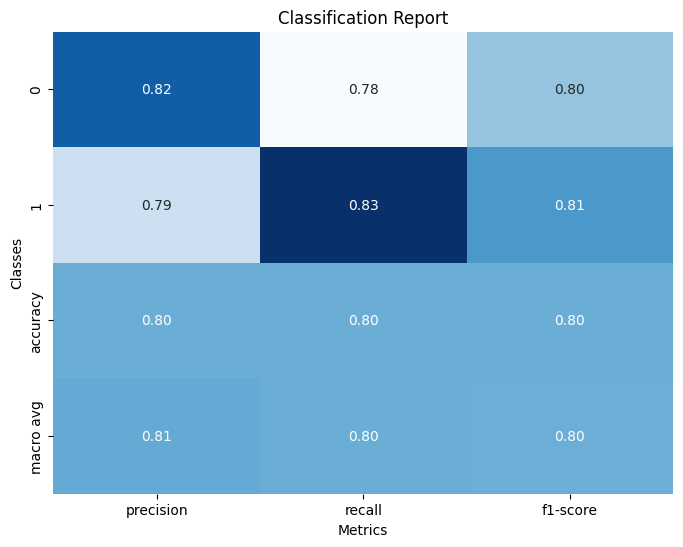

In [ ]:
# Plot the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=False)

# Add titles and labels
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")

# Save the heatmap as an image
plt.savefig("classification_report.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

In [ ]:
import joblib

In [ ]:
# Saving the trained model to a file

joblib.dump(best_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Development of AI Assistant

### Assistant With Random Forest Classifier

In [ ]:
# Loading the pre-trained random forest model

trained_model = joblib.load('random_forest_model.pkl')

In [ ]:
# Installing necessary dependencies


!pip install accelerate==1.2.0
!pip install bitsandbytes==0.45.0
!pip install transformers==4.47.0
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 908.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
import json
import torch
from transformers import (AutoModelForCausalLM, BitsAndBytesConfig, pipeline, AutoTokenizer)
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer

Loading tokenizer and the model

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-german-cased')
model_bert = BertForSequenceClassification.from_pretrained('bert-base-german-cased', num_labels=1)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-german-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processing user input with BERT

In [ ]:
# Function to get the user input

def get_user_input():
    user_input = input("Please describe the patient's symptoms: ")
    return user_input

In [ ]:
# Stemming plugin to perform stemming of German language text

stemmer = SnowballStemmer("german")

# Function to pre-process text

def preprocess_text(text):

    text = text.lower()
    words = re.findall(r'\b\w+\b', text)
    stemmed_words = [stemmer.stem(word) for word in words]

    return " ".join(stemmed_words)

Feature Mappings

In [ ]:
# Dictionary mapping the features with the synonyms

feature_mappings = {
        'alcohol': {'alcohol', 'bier', 'alkoholintox', 'vodka', 'wodka', 'wein', 'alkoholkonsum', 'alkoholabusus', 'alkoholisiert'},
        'unruh': {'unruh', 'agitation', 'aggressiv', 'stress', 'panikattack'},
        'suizidal': {'suizidal', 'depression', 'suizidgedank', 'suizid', 'suizidversuch', 'depressiv', 'depressionen'},
        'psychisch': {'psychisch', 'psych'},
        'pain_related' : {'bein', 'bauch', 'kopf', 'brust', 'bod', 'arm', 'extremitat', 'stark', 'abdom', 'bauchschmerz','fuss', 'knie','hand', 'kopfschmerz'},
        'ausnahmezustand': {'ausnahmezustand'},
        'schwindel': {'schwindel'},
        'azverschlechter' : {'azverschlechter'},
        'fieb' : {'fieb'},
        'atemnot' : {'atemnot'}
    }

Creating feature Vector

In [ ]:
# Importing spacy for checking Named Entity Recognition (NER)

!python -m spacy download de_core_news_sm

import spacy

nlp = spacy.load("de_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 42.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Function to detect negation

def is_negated(tokens, feature):
    negation_terms = ['nicht', 'kein', 'keine', 'niemals', 'nichts', 'weder', 'ohne']
    for i, token in enumerate(tokens):
        if token in negation_terms:
            if feature in tokens[i:]:
                return True
    return False

In [ ]:
# Function to extract features using NER and feature mappings

def extract_features_with_ner(user_input, feature_mappings):

    text = preprocess_text(user_input)

    # Tokenizing the text with BERT tokenizer
    inputs = tokenizer(text, return_tensors="pt")

    # Performing a forward pass with the model
    with torch.no_grad():
      outputs = model_bert(**inputs)

    # Processing the text with spaCy's NER
    doc = nlp(text)

    # Initializing the feature vector
    features = {feature: 0 for feature in feature_mappings}

    # Tokenizing the input text
    tokens = tokenizer.tokenize(text.lower())

    # Check for each feature mapping
    for feature, terms in feature_mappings.items():
        for term in terms:
            if term in text.lower():
                if is_negated(tokens, term):
                    features[feature] = 0  # Negated feature is absent
                else:
                    features[feature] = 1  # Feature is present

    # Extract medical entities using NER
    for ent in doc.ents:
        for feature, terms in feature_mappings.items():
            if ent.text.lower() in terms:
                # If an NER entity matches any term, mark it as present
                features[feature] = 1

    return features


Passing features to the trained model

In [ ]:
def make_prediction(features):
    feature_names = ['psychisch', 'ausnahmezustand', 'alkohol', 'azverschlechter', 'unruh', 'suizidal', 'schwindel', 'fieb', 'pain_related', 'atemnot']
    feature_df = pd.DataFrame([features], columns=feature_names)
    prediction = trained_model.predict(feature_df)
    return prediction[0]


Generating response

In [ ]:
def generate_response(prediction):
    if prediction == 0:
        response_text = "Based on the input, it doesn't seem like a psychiatric condition, but you should consult a physician for a detailed assessment."
    else:
        response_text = "The given symptoms indicate a psychiatric condition. Please seek medical help immediately."

    return response_text


Output

In [ ]:
def end_to_end_process():
    # Step 1: Get user input
    user_input = get_user_input()

    # Step 2: Extract features
    custom_features = extract_features_with_ner(user_input, feature_mappings)

    # Step 3: Make prediction using the trained model in the notebook
    pred = make_prediction(custom_features)

    # Step 4: Generate response based on the model prediction
    bert_response = generate_response(pred)

    print("Response to User:", bert_response)




In [ ]:
end_to_end_process()

Please describe the patient's symptoms: Unbekannt Patient liegend vorm eingang kaufland wach und ansrechbar vorgefuden starker alkoholeinfluss  BZ 83 Unbekannt Unbekannt
Response to User: Based on the input, it doesn't seem like a psychiatric condition, but you should consult a physician for a detailed assessment.


### Assistant With BERT

Loading tokenizer and the model

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments

In [ ]:
model_name = 'bert-base-german-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-german-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Defining function to tokenize text

In [ ]:
def tokenize_data(texts, tokenizer, max_length=512):
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )

Defining dataset class

In [ ]:
from torch.utils.data import Dataset

class MedicalDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

Setting training arguments

In [ ]:
import os

In [ ]:
# Disable wandb logging

os.environ["WANDB_DISABLED"] = "true"

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Loading data

In [ ]:
#path_bert_dataset = '/content/drive/MyDrive/Arbeit/BERT_dataset.csv'

In [ ]:
#dataset = pd.read_csv(path_bert_dataset);

In [ ]:
dataset = pd.read_csv('BERT_dataset.csv');

In [ ]:
dataset.head(5)

,text,label
0,Unbekannt Patient liegend vorm eingang kauflan...,1
1,Bewusstseinsstörung Pat auf dem Boden liegend ...,1
2,Bewusstseinsstörung Pat auf Bank sitzend vorge...,1
3,AZVerschlechterung Patient mit unspezifischen ...,1
4,Agitation krankhafte Unruhe Pat Liegend auf st...,1


Pre-processing the raw data

In [ ]:
# Pre-processing the text

dataset['processed_text'] = dataset['text'].apply(preprocess_text)

In [ ]:
dataset.head(5)

,text,label,processed_text
0,Unbekannt Patient liegend vorm eingang kauflan...,1,unbekannt patient liegend vorm eingang kauflan...
1,Bewusstseinsstörung Pat auf dem Boden liegend ...,1,bewusstseinsstor pat auf dem bod liegend nicht...
2,Bewusstseinsstörung Pat auf Bank sitzend vorge...,1,bewusstseinsstor pat auf bank sitzend vorgefun...
3,AZVerschlechterung Patient mit unspezifischen ...,1,azverschlechter patient mit unspezif ruckenfla...
4,Agitation krankhafte Unruhe Pat Liegend auf st...,1,agitation krankhaft unruh pat liegend auf stra...


In [ ]:
dataset.shape

(24158, 3)

Transforming pre-processed data into dataset format accepted by BERT

In [ ]:
# Splitting the data into training and evaluation sets
train_texts, eval_texts, train_labels, eval_labels = train_test_split(
     dataset["processed_text"].values, dataset["label"].values, test_size=0.2, random_state=42, stratify=dataset["label"].values
)

In [ ]:
# Tokenizing the training and evaluation datasets
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
eval_encodings = tokenizer(list(eval_texts), truncation=True, padding=True, max_length=128)


In [ ]:
# Ensure labels are tensors and lengths match
train_labels = torch.tensor(list(train_labels))
eval_labels = torch.tensor(list(eval_labels))

In [ ]:
# Creating the datasets
train_dataset = MedicalDataset(train_encodings, train_labels)
eval_dataset = MedicalDataset(eval_encodings, eval_labels)

Function to evaluate performance using compute metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

Model training function

In [ ]:
# Trainer function to set training parameters

from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.188800,0.114315,0.964611,0.964008,0.980728,0.947848
2,0.080800,0.117766,0.968129,0.967823,0.977215,0.958609
3,0.040000,0.126128,0.970406,0.970239,0.975722,0.964818
4,0.062400,0.135899,0.969371,0.969180,0.975272,0.963162


TrainOutput(global_step=4832, training_loss=0.08999096015614723, metrics={'train_runtime': 2042.645, 'train_samples_per_second': 37.845, 'train_steps_per_second': 2.366, 'total_flos': 5084884255887360.0, 'train_loss': 0.08999096015614723, 'epoch': 4.0})

Saving and exporting trained BERT model

In [ ]:
# Setting the directory where the model will be saved
output_dir = "/content/drive/MyDrive/Arbeit" #Enter loctation address to export model

# Saving the trained model
trainer.save_model(output_dir)

# Saving the tokenizer
tokenizer.save_pretrained(output_dir)


('/content/drive/MyDrive/Arbeit/tokenizer_config.json',
 '/content/drive/MyDrive/Arbeit/special_tokens_map.json',
 '/content/drive/MyDrive/Arbeit/vocab.txt',
 '/content/drive/MyDrive/Arbeit/added_tokens.json',
 '/content/drive/MyDrive/Arbeit/tokenizer.json')

Making predictions for new data

In [ ]:
# New User Input

def get_user_input_bert(preprocess_text):
    user_input = input("Please describe the patient's symptoms: ")
    text = preprocess_text(user_input)
    return text

In [ ]:
# Defining function for making prediction

def predict_bert(text, model, tokenizer, device="cuda"):
    # Tokenizing the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Moving inputs to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Ensuring the model is on the correct device
    model = model.to(device)

    # Performing inference
    outputs = model(**inputs)
    probs = outputs.logits.softmax(dim=-1)
    return torch.argmax(probs, dim=1).item()

In [ ]:
def generate_response_bert(prediction):
    if prediction == 0:
        response_text = "Based on the input, it doesn't seem like a psychiatric condition, but you should consult a physician for a detailed assessment."
    else:
        response_text = "The given symptoms indicate a psychiatric condition. Please seek medical help immediately."

    return response_text

In [ ]:
def end_to_end_process_bert():
    # Step 1: Get user input
    user_input = get_user_input_bert(preprocess_text)

    # Step23: Make prediction using the trained model in the notebook
    pred = predict_bert(user_input, model, tokenizer)

    # Step 4: Generate response based on the model prediction
    bert_response = generate_response_bert(pred)

    print("Response to User:", bert_response)

In [ ]:
end_to_end_process_bert()

Please describe the patient's symptoms: Psychischer Ausnahmezustand Patientin hyperventilierend vorgefunden nach Rückatmung Besserung vital stabil macht Eindruck getrunken zu haben depressiv Unbekannt
Response to User: The given symptoms indicate a psychiatric condition. Please seek medical help immediately.
